# Machine Learning to forecast Bitcoin price movements
# Part 1: Obtaining, exploring and preparing the data

As with any other Machine Learning application, the first step is to get and prepare the data for our models. This notebook will focus in doing precisely this, explaining step by step the data obtained and using graphs to visualize these features. At the end of the notebook, we prepare clean data sets, which will be stored in the `data/` folder.

## Obtaining and labelling stock market data

As described in our project proposal, we will first use historical data from financial data as our data inputs. For this, we are going to use `yfinance` library, that scrapes this data from Yahoo Finance, returning it as a pandas dataframe, which will facilitate most of this work, and also we'll use `quandl`.

However, since the tickers mostly have special signs and we want to create an object for each ticker historical data, I'll first get the data and clear the name to get an appropiate object.

In [1]:
%pip install yfinance quandl

Note: you may need to restart the kernel to use updated packages.


In [7]:
# importing commonly used libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [8]:
tickers = [
#             'SPY',
           '^GSPC',
           '^IXIC', 
           'GC=F', 
           'SI=F',
           'CL=F', 
           '^TNX',
           'BTC-USD',
           '^N225',
           '^ftse', 
           'EURUSD=X',
           '000001.SS', 
           '^HSI',
            ]

signs = ['=','^','-','.']
ma_values = [4,96,200]
rsi_values = {
    'k': 3,
    'd': 3,
    'alpha':14
}

def change_name(ticker):
    if ticker == 'tnx':
        x = 'rates'
    elif ticker == 'gspc':
        x = 'gspc'
    elif ticker == 'sif':
        x = 'silver'
    elif ticker == 'gcf':
        x = 'gold'
    elif ticker == 'ixic':
        x = 'nasdaq'
    elif ticker == 'clf':
        x = 'crude oil'
    elif ticker == 'btcusd':
        x = 'btc'
    elif ticker == 'n225':
        x = 'nikkei'
    elif ticker == 'eurusdx':
        x = 'euro'
    elif ticker == '000001ss':
        x = 'shangai'
    else:
        x = ticker
    return x

def lower_clean_name(word, signs):
    word = word.lower()
    for char in signs: 
        word = word.replace(char, '')
    return word

# test change labels amongst indices

labels = [lower_clean_name(word,signs) for word in tickers]
changed_labels = [change_name(x) for x in labels]

for x in range(len(labels)):
    print(labels[x] +' = '+changed_labels[x])


gspc = gspc
ixic = nasdaq
gcf = gold
sif = silver
clf = crude oil
tnx = rates
btcusd = btc
n225 = nikkei
ftse = ftse
eurusdx = euro
000001ss = shangai
hsi = hsi


In [9]:
ticker_concat = " ".join(tickers)
data_ohlc = yf.download(ticker_concat, start="2008-01-01", threads=False)
# data_ticker = yf.download(ticker_concat, start="2008-01-01", group_by='tickers')

[*********************100%***********************]  12 of 12 completed


In [10]:
data_ohlc.tail()

Adj Close                                                  \
              000001.SS       BTC-USD       CL=F  EURUSD=X         GC=F   
Date                                                                      
2021-09-14  3662.600098  47092.492188  70.459999  1.181195  1804.699951   
2021-09-15  3656.219971  48176.347656  72.610001  1.180498  1792.400024   
2021-09-16  3607.090088  47783.359375  72.610001  1.182000  1754.599976   
2021-09-17  3613.969971  47267.519531  71.970001  1.176747  1749.400024   
2021-09-18          NaN  48287.042969        NaN       NaN          NaN   

                                                                             \
                 SI=F        ^FTSE        ^GSPC          ^HSI         ^IXIC   
Date                                                                          
2021-09-14  23.841999  7034.100098  4443.049805  25502.230469  15037.759766   
2021-09-15  23.759001  7016.500000  4480.700195  25033.210938  15161.530273   
2021-09-16  22.752001  7027.500000  4473.750000  24667.849609  15181.919922   
2021-09-17  22.295000  6963.600098  4432.990234  24920.759766  15043.969727   
2021-09-18        NaN          NaN          NaN           NaN           NaN   

                                       Close                           \
                   ^N225   ^TNX    000001.SS       BTC-USD       CL=F   
Date                                                                    
2021-09-14  30670.099609  1.277  3662.600098  47092.492188  70.459999   
2021-09-15  30511.710938  1.304  3656.219971  48176.347656  72.610001   
2021-09-16  30323.339844  1.331  3607.090088  47783.359375  72.610001   
2021-09-17  30500.050781  1.370  3613.969971  47267.519531  71.970001   
2021-09-18           NaN    NaN          NaN  48287.042969        NaN   

                                                                        \
            EURUSD=X         GC=F       SI=F        ^FTSE        ^GSPC   
Date                                                                     
2021-09-14  1.181195  1804.699951  23.841999  7034.100098  4443.049805   
2021-09-15  1.180498  1792.400024  23.759001  7016.500000  4480.700195   
2021-09-16  1.182000  1754.599976  22.752001  7027.500000  4473.750000   
2021-09-17  1.176747  1749.400024  22.295000  6963.600098  4432.990234   
2021-09-18       NaN          NaN        NaN          NaN          NaN   

                                                                    High  \
                    ^HSI         ^IXIC         ^N225   ^TNX    000001.SS   
Date                                                                       
2021-09-14  25502.230469  15037.759766  30670.099609  1.277  3723.850098   
2021-09-15  25033.210938  15161.530273  30511.710938  1.304  3677.530029   
2021-09-16  24667.849609  15181.919922  30323.339844  1.331  3677.919922   
2021-09-17  24920.759766  15043.969727  30500.050781  1.370  3620.959961   
2021-09-18           NaN           NaN           NaN    NaN          NaN   

                                                                       \
                 BTC-USD       CL=F  EURUSD=X         GC=F       SI=F   
Date                                                                    
2021-09-14  47218.125000  71.220001  1.184699  1806.199951  23.850000   
2021-09-15  48450.468750  73.139999  1.183300  1803.699951  23.799999   
2021-09-16  48486.828125  72.989998  1.182313  1792.900024  23.514999   
2021-09-17  48160.921875  72.720001  1.178967  1763.000000  22.905001   
2021-09-18  48757.320312        NaN       NaN          NaN        NaN   

                                                                  \
                  ^FTSE        ^GSPC          ^HSI         ^IXIC   
Date                                                               
2021-09-14  7068.500000  4485.680176  25900.679688  15181.190430   
2021-09-15  7047.299805  4486.870117  25411.910156  15174.379883   
2021-09-16  7059.000000  4485.870117  25045.550781  15205.500000   


In [11]:
# Renaming columns to changed labels

close = data_ohlc['Close'].fillna(method='ffill')
close.rename(columns = lambda x: change_name(lower_clean_name(x,signs)), inplace=True)

In [12]:
close.columns

Index(['shangai', 'btc', 'crude oil', 'euro', 'gold', 'silver', 'ftse', 'gspc',
       'hsi', 'nasdaq', 'nikkei', 'rates'],
      dtype='object')

## Returns and cumulative returns

To make stock prices comparable, we first need to bring all of them into the same base. For this, we will use the `daily returns` of holding this stock. This way, instead of comparing stocks with different prices (for example, Nikkei starting at 10k USD vs FTSE at 5k USD) we will bring all of them to the base of one at the start of the timeframe and record their daily increase or decrease in % to that base.

<AxesSubplot:title={'center':'Price comparison of assets, without BTC [$]'}, xlabel='Date'>

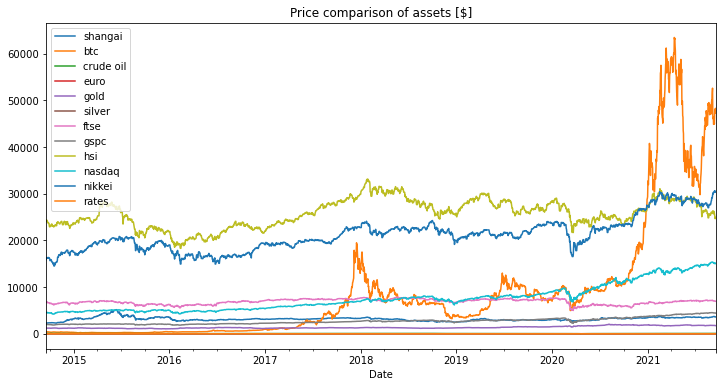

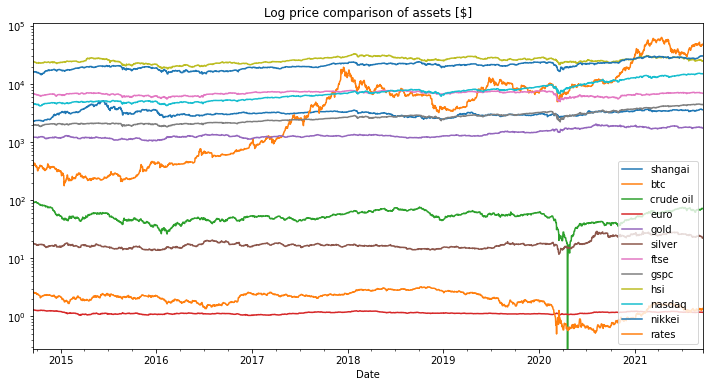

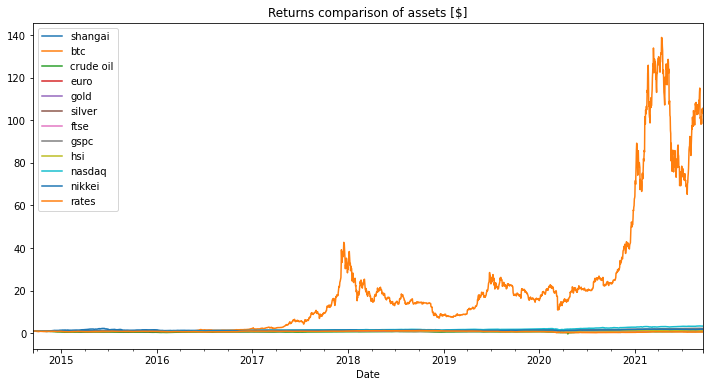

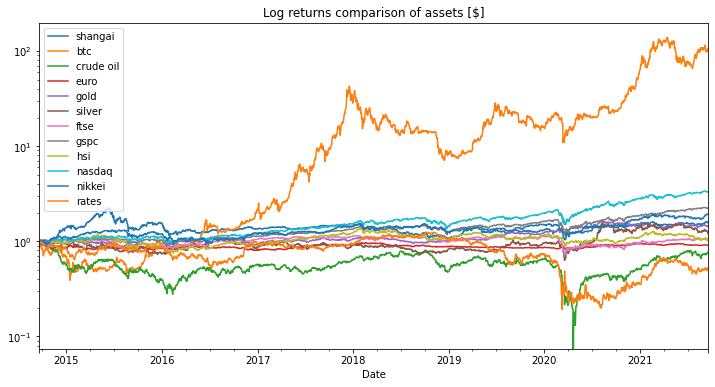

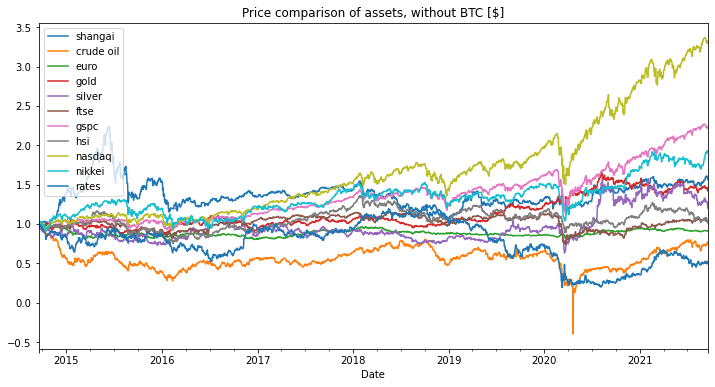

In [13]:
close = close[close.btc.notnull()]
returns = close.pct_change(1)
cumulative = (1 + returns).cumprod()
close.plot(figsize=(12,6),label='Price', title='Price comparison of assets [$]')
close.plot(figsize=(12,6),label='Price (log scale)', logy=True, title='Log price comparison of assets [$]')
cumulative.plot(figsize=(12,6),label='Cumulative Returns', title='Returns comparison of assets [$]')
cumulative.plot(figsize=(12,6),label='Cumulative Returns (log)', logy=True, title='Log returns comparison of assets [$]')
cumulative.loc[:,cumulative.columns != 'btc'].plot(
    figsize=(12,6), label='Cumulative Returns', title='Price comparison of assets, without BTC [$]')

Even by using returns as the base metric, we can see that we needed to plot them in a logarithmic scale, for their changes to be made comparable with Bitcoin, given the astonishing returns on the asset since 2010.

## Performing technical analysis calculations

Now we will calculate several indicators typically used in technical analysis of stock prices, such as simple moving averages, the (stochastic) relative strength index and other statistical measures s.a. the expanding standard deviation of Bitcoin price.

### Moving Averages

In [14]:
def transform_ma(data, ma1=4, ma2=96, ma3=200):
    data['MA'+str(ma1)] = round(data['Close'].rolling(ma1).mean(),0)
    data['MA'+str(ma2)] = round(data['Close'].rolling(ma2).mean(),0)
    data['MA'+str(ma3)] = round(data['Close'].rolling(ma3).mean(),0)    
    return data

### (Stochastic) Relative Strenght Index

In [15]:
def transform_rsi(data, alpha=14, smoothK=3, smoothD=3):
    
    data['change'] = data['Close'].pct_change(1)
    data['cum_change'] = (data['change']+1).cumprod()
    data['k'] = 0
    data['d'] = 0

    cond_k = data.change > 0
    cond_d = data.change < 0

    data['k'] = data.k.mask(cond_k, data['change'])
    data['d'] = data.d.mask(cond_d, - data['change'])
    # data['num'] = data['k'].rolling(alpha).mean()
    
    data['num'] = pd.Series.ewm(data['k'], span=alpha).mean()
    data['div'] = pd.Series.ewm(data['d'], span=alpha).mean()
    
    # data['div'] = data['d'].rolling(alpha).mean()
    data['rs'] = data['num']/data['div']
    data['RSI'] = (100 - (100/(1+data['rs'])))
    data['RSImin'] = data['RSI'].rolling(alpha).min()
    data['RSImax'] = data['RSI'].rolling(alpha).max()
    data['stochRSI'] = 100*(data['RSI'] - data['RSImin']) / (data['RSImax'] - data['RSImin'])
    data['smoothK'] = round(data['stochRSI'].rolling(smoothK).mean(),2)
    data['smoothD'] = round(data['smoothK'].rolling(smoothD).mean(),2)
    data['K1'] = data['smoothK'].shift(1)
    data['D1'] = data['smoothD'].shift(1)

    # cond_num_zero = data.num == 0
    # data['RSI'] = data.RSI.mask(cond_num_zero, 0)

    # cond_div_zero = data.div == 0
    # data['RSI'] = data.RSI.mask(cond_div_zero, 100)

    return data

def transform_std(df, confidence=80):
    df['btc_std_dev'] = df['change'].expanding(2).std()
    df['btc_mean'] = df['change'].expanding(2).mean()
    # df['conf_int_p'] = np.percentile(df['change'], (100-confidence)/2)
    # df['conf_int_m'] = np.percentile(df['change'], confidence + (100-confidence)/2)
    df['std_dif'] = (df['Close'] - df['btc_std_dev']).abs()

    return df

In [16]:
btc = yf.Ticker('BTC-USD')
btc = btc.history(start="2008-01-01")

btc.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
# btc = data_ticker['BTCUSD=X']
# btc = btc[btc.Close.notnull()]
btc = transform_std(transform_rsi(transform_ma(btc, ma_values[0], ma_values[1], ma_values[2])))
btc.tail()

Open          High           Low         Close  \
Date                                                                 
2021-09-14  44960.050781  47218.125000  44752.332031  47092.492188   
2021-09-15  47098.000000  48450.468750  46773.328125  48176.347656   
2021-09-16  48158.906250  48486.828125  47079.558594  47783.359375   
2021-09-17  47771.003906  48160.921875  46832.523438  47267.519531   
2021-09-18  47295.519531  48757.320312  47111.398438  48299.167969   

                 Volume      MA4     MA96    MA200    change  cum_change  \
Date                                                                       
2021-09-14  38652152880  45830.0  40284.0  45912.0  0.047359  102.971768   
2021-09-15  30484496466  46574.0  40397.0  45922.0  0.023015  105.341711   
2021-09-16  31764293754  47004.0  40525.0  45935.0 -0.008157  104.482409   
2021-09-17  28727713711  47580.0  40610.0  45923.0 -0.010795  103.354481   
2021-09-18  28344686592  47882.0  40694.0  45923.0  0.021826  105.610268   

                   k         d       num       div        rs        RSI  \
Date                                                                      
2021-09-14  0.047359  0.000000  0.014067  0.013040  1.078724  51.893563   
2021-09-15  0.023015  0.000000  0.015260  0.011302  1.350253  57.451396   
2021-09-16  0.000000  0.008157  0.013225  0.010882  1.215303  54.859440   
2021-09-17  0.000000  0.010795  0.011462  0.010871  1.054386  51.323661   
2021-09-18  0.021826  0.000000  0.012844  0.009421  1.363270  57.685741   

               RSImin     RSImax   stochRSI  smoothK  smoothD     K1     D1  \
Date                                                                          
2021-09-14  33.714587  75.602363  43.399238    24.69    15.44  12.23   8.47   
2021-09-15  33.714587  75.602363  56.667629    36.20    24.37  24.69  15.44   
2021-09-16  33.714587  75.602363  50.479771    50.18    37.02  36.20  24.37   
2021-09-17  33.714587  75.602363  42.038695    49.73    45.37  50.18  37.02   
2021-09-18  33.714587  75.602363  57.227086    49.92    49.94  49.73  45.37   

            btc_std_dev  btc_mean       std_dif  
Date                                             
2021-09-14     0.039153  0.002593  47092.453034  
2021-09-15     0.039148  0.002601  48176.308509  
2021-09-16     0.039141  0.002597  47783.320234  
2021-09-17     0.039134  0.002592  47267.480397  
2021-09-18     0.039128  0.002599  48299.128841

In [17]:
btc.describe()

Open          High           Low         Close        Volume  \
count   2555.000000   2555.000000   2555.000000   2555.000000  2.555000e+03   
mean    8965.955269   9220.135961   8689.595861   8983.918663  1.347773e+10   
std    13192.892968  13590.838474  12738.948685  13213.851892  1.984027e+10   
min      176.897003    211.731003    171.509995    178.102997  5.914570e+06   
25%      574.816010    579.670471    569.860992    575.010010  7.284395e+07   
50%     5271.746582   5363.257324   5169.283203   5279.348145  4.390020e+09   
75%     9588.341797   9752.678711   9378.068848   9587.484375  2.127536e+10   
max    63523.753906  64863.097656  62208.964844  63503.457031  3.509679e+11   

                MA4          MA96         MA200       change   cum_change  \
count   2552.000000   2460.000000   2356.000000  2554.000000  2554.000000   
mean    8966.084639   8473.886992   7907.531409     0.002599    19.651408   
std    13175.711419  12083.304522  10625.049202     0.039128    28.896520   
min      199.000000    237.000000    246.000000    -0.371695     0.389437   
25%      576.000000    609.000000    603.750000    -0.012817     1.257615   
50%     5285.000000   5452.500000   5879.500000     0.002027    11.550078   
75%     9537.500000   9393.500000   9061.500000     0.018267    20.970866   
max    62875.000000  54511.000000  46153.000000     0.252472   138.855749   

                 k            d          num          div           rs  \
count  2555.000000  2555.000000  2555.000000  2555.000000  2554.000000   
mean      0.014139     0.011541     0.014126     0.011581     2.000447   
std       0.025137     0.023918     0.008972     0.008580     3.041803   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.007377     0.005364     0.749074   
50%       0.002022     0.000000     0.012099     0.009321     1.205141   
75%       0.018266     0.012808     0.019080     0.015763     2.178210   
max       0.252472     0.371695     0.078900     0.063441    62.372352   

               RSI       RSImin       RSImax     stochRSI      smoothK  \
count  2554.000000  2541.000000  2541.000000  2541.000000  2539.000000   
mean     55.462420    37.937860    71.818206    52.280110    52.276640   
std      17.852836    15.619182    14.126781    35.185411    31.705501   
min       0.000000     0.000000    18.604388     0.000000     0.000000   
25%      42.826882    26.631963    60.974743    20.701420    23.470000   
50%      54.651400    37.518910    71.682680    52.217368    52.790000   
75%      68.535753    48.726119    84.332041    86.026361    81.925000   
max      98.422025    81.462209    98.422025   100.000000   100.000000   

           smoothD           K1           D1  btc_std_dev     btc_mean  \
count  2537.000000  2538.000000  2536.000000  2553.000000  2553.000000   
mean     52.283729    52.277569    52.284653     0.037421     0.001262   
std      30.237585    31.711714    30.243512     0.003155     0.002853   
min       0.000000     0.000000     0.000000     0.001473    -0.070884   
25%      24.320000    23.450000    24.307500     0.035211     0.000898   
50%      52.350000    52.820000    52.365000     0.038629     0.002203   
75%      80.570000    81.952500    80.580000     0.039186     0.002570   
max     100.000000   100.000000   100.000000     0.061565     0.003865   

            std_dif  
count   2553.000000  
mean    8990.573785  
std    13216.862522  
min      178.061070  
25%      575.438752  
50%     5285.100668  
75%     9593.857055  
max    63503.418201

<AxesSubplot:title={'center':'Standard deviation of daily change'}, xlabel='Date'>

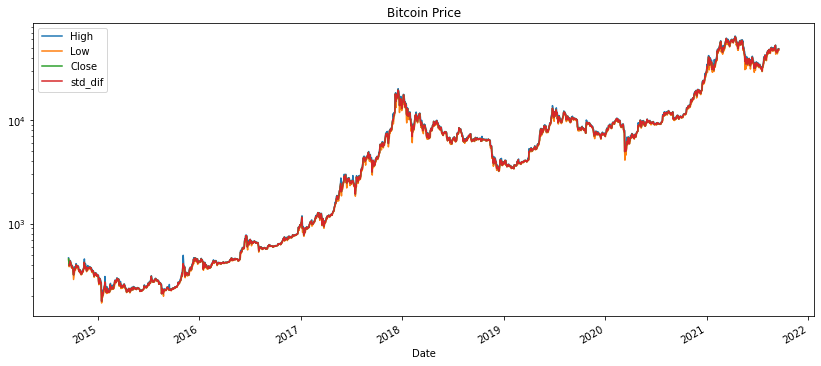

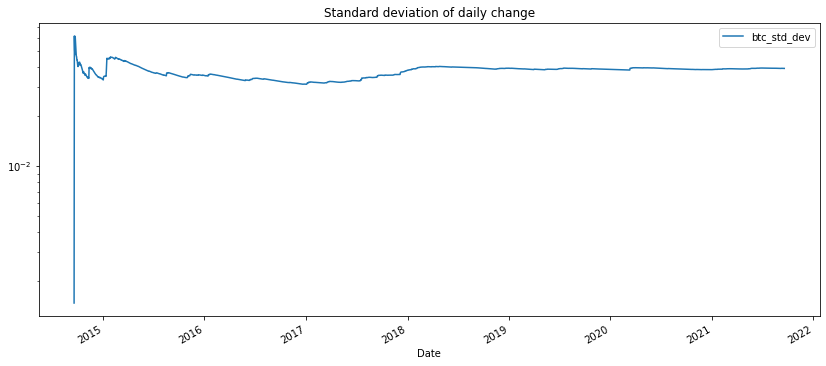

In [18]:
btc[['High','Low','Close','std_dif']].plot(figsize=(14,6),logy=True, title='Bitcoin Price')
btc[['btc_std_dev']].plot(figsize=(14,6), title='Standard deviation of daily change',logy=True)

In [19]:
# Initial selection of features to the model

btc = btc[[f'MA{ma_values[0]}',f'MA{ma_values[1]}', f'MA{ma_values[2]}', 'stochRSI', 'RSI','btc_std_dev','std_dif']].fillna(method='bfill')

In [20]:
data = pd.concat([cumulative, btc], axis=1)
data.drop(data.index[0], inplace=True)
data.tail()

shangai         btc  crude oil      euro      gold    silver  \
Date                                                                        
2021-09-14  1.586989  102.971768   0.746240  0.911481  1.462006  1.277501   
2021-09-15  1.584224  105.341711   0.769011  0.910943  1.452041  1.273054   
2021-09-16  1.562936  104.482409   0.769011  0.912102  1.421419  1.219097   
2021-09-17  1.565917  103.354481   0.762233  0.908049  1.417207  1.194610   
2021-09-18  1.565917  105.583756   0.762233  0.908049  1.417207  1.194610   

                ftse      gspc       hsi    nasdaq    nikkei     rates  \
Date                                                                     
2021-09-14  1.037340  2.219782  1.046185  3.296171  1.930313  0.491154   
2021-09-15  1.034745  2.238593  1.026944  3.323301  1.920344  0.501538   
2021-09-16  1.036367  2.235120  1.011956  3.327770  1.908488  0.511923   
2021-09-17  1.026943  2.214757  1.022331  3.297533  1.919610  0.526923   
2021-09-18  1.026943  2.214757  1.022331  3.297533  1.919610  0.526923   

                MA4     MA96    MA200   stochRSI        RSI  btc_std_dev  \
Date                                                                       
2021-09-14  45830.0  40284.0  45912.0  43.399238  51.893563     0.039153   
2021-09-15  46574.0  40397.0  45922.0  56.667629  57.451396     0.039148   
2021-09-16  47004.0  40525.0  45935.0  50.479771  54.859440     0.039141   
2021-09-17  47580.0  40610.0  45923.0  42.038695  51.323661     0.039134   
2021-09-18  47882.0  40694.0  45923.0  57.227086  57.685741     0.039128   

                 std_dif  
Date                      
2021-09-14  47092.453034  
2021-09-15  48176.308509  
2021-09-16  47783.320234  
2021-09-17  47267.480397  
2021-09-18  48299.128841

## Getting fundamental Bitcoin data

Fundamental Bitcoin's blockchain data will also be included, such as hashrate, mining difficulty, (daily) number of transactions and cost per transaction.

In [62]:
import quandl
from settings import QUANDLKEY

quandl.ApiConfig.api_key = QUANDLKEY # (insert if available, else there is a ratelimit)

In [63]:

# btc mining is an interesting source, but free data has not the same quality ;)
# btcmining = quandl.get('BITCOINWATCH/MINING') # total btc and marketcap, bad quality data
# btcmining.fillna(method='ffill').plot(legend=None, logy=True)

btc_hrate = quandl.get('BCHAIN/HRATE') # hashrate
btc_diff = quandl.get('BCHAIN/DIFF') # difficulty
btc_ntrat = quandl.get('BCHAIN/NTRAT') # number of transactions
btc_cptra = quandl.get('BCHAIN/CPTRA') # cost per transaction

<AxesSubplot:xlabel='Date'>

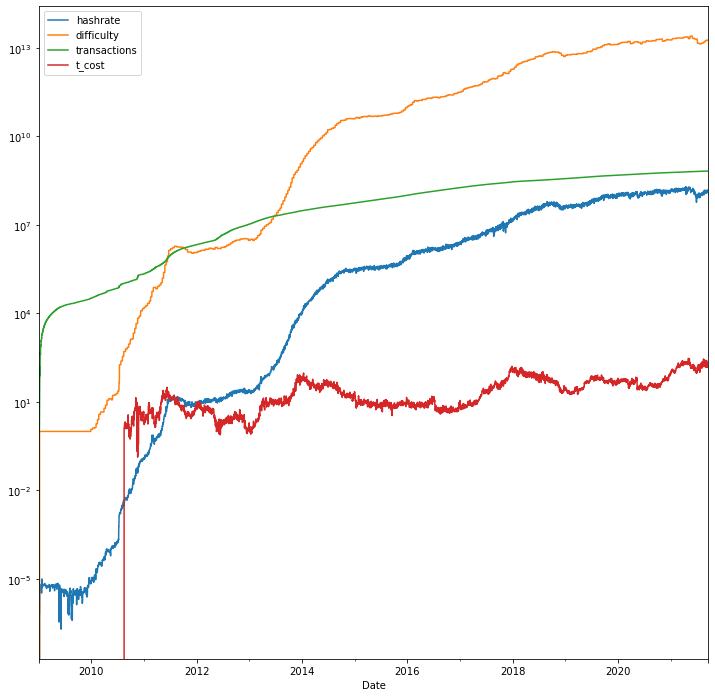

In [36]:
fundamentals = pd.concat([btc_hrate, btc_diff, btc_ntrat, btc_cptra], axis=1)
fundamentals.fillna(method='bfill')
fundamentals.columns = ['hashrate','difficulty','transactions','t_cost']
fundamentals.plot(figsize=(12,12), logy=True)

In [37]:
df = pd.concat([data,fundamentals], axis=1)
df = df[df.btc.notnull()]

## Normalizing functions for dataframes

In order to make sure that no feature becomes more important in the dataset than the others, we will create functions to normalize these and bring them back to the dataset's original state. This will be used later before saving the feed-in dataset.

In [38]:
def min_max_scaler(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df, df.min(), df.max()

def back_min_max(ndf,mindf,maxdf):
    df = ndf*(maxdf-mindf) + mindf
    return df

## Labelling buy, sell and no-trade signals

Following our end-goal, we will need to predict whether prices are going to go up or down. For this, the condition for the labels will be that if price goes up by more than a certain confidence level it's a buy, down a certain confidence level or less a sell, and values in between labelled as no-trade zone.

We will need to shift by one this values to become the predicted labels of our trained model.

In [39]:
returns.btc.describe()

count    2558.000000
mean        0.002595
std         0.039098
min        -0.371695
25%        -0.012780
50%         0.002000
75%         0.018263
max         0.252472
Name: btc, dtype: float64

Given the confidence intervals above, I will take the top 75% interval +2.3% as buy label (1), -1.36% for the sell label (2), and the values in between as no-trade (0). The objective of the classification problem will be to **predict the next day's label to give a trading signal**.

(array([  0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   1.,   0.,   2.,   1.,   0.,   2.,   1.,   4.,   0.,
          2.,   1.,   6.,   5.,   8.,  11.,   0.,   9.,   6.,  10.,  12.,
         15.,  31.,  22.,  24.,  28.,  28.,  47.,  58.,  65.,  78., 111.,
        121., 190., 259., 282., 218., 175., 122.,  94.,  91.,  63.,  56.,
         54.,  38.,  36.,  21.,  20.,  17.,  18.,  15.,   8.,   6.,   6.,
          7.,  13.,   7.,   4.,   5.,   2.,   4.,   2.,   0.,   0.,   1.,
          3.,   1.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

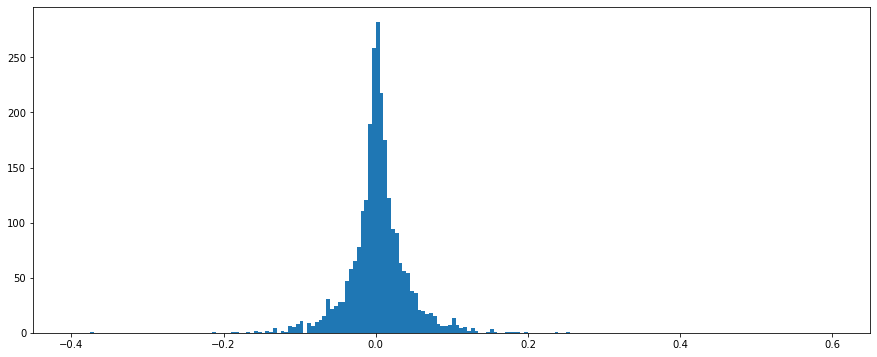

In [40]:
plt.figure(figsize = (15,6))
plt.hist(returns.btc, bins=200 , range=(-0.4, 0.6), label='Distribution of Bitcoin daily returns')

In [41]:
labels = 0

In [42]:
labels = pd.DataFrame(returns.btc)
labels['returns'] = returns.btc
labels = pd.concat([labels.returns, close.btc[close.btc.notnull()]], axis =1)
labels.rename(columns={'btc':'btc_close'}, inplace=True)

In [43]:
buy_cond = labels.returns > 0.022985 # returns.btc.describe()['75%']
sell_cond = labels.returns < -0.013636 # returns.btc.describe()['25%']

labels['c_label'] = 1
labels['c_label'] = labels['c_label'].mask(buy_cond, 2)
labels['c_label'] = labels['c_label'].mask(sell_cond, 0)


# Backtesting, used for later

labels['bkt_returns'] = 0
labels['bkt_returns'] = labels['bkt_returns'].mask(buy_cond, labels.returns)
labels['bkt_returns'] = labels['bkt_returns'].mask(sell_cond, labels.returns)

labels.head()

returns   btc_close  c_label  bkt_returns
Date                                                  
2014-09-17       NaN  457.334015        1     0.000000
2014-09-18 -0.071926  424.440002        0    -0.071926
2014-09-19 -0.069843  394.795990        0    -0.069843
2014-09-20  0.035735  408.903992        2     0.035735
2014-09-21 -0.024659  398.821014        0    -0.024659

In [44]:
# row data cleaning
df.describe().loc['count'].min()

2554.0

### Data cleaning
I'll consider the minimal available records as starting point and select the training data. Dates afterwards will be test data. We will also get rid of NA values that aren't useful for our analysis.

In [45]:
df = pd.concat([df,labels], axis=1)
df.rename(columns={'btc':'btc_cumulative'}, inplace=True)

df = df[-int(df.describe().loc['count'].min()):]
df.describe()

shangai  btc_cumulative    crude oil         euro         gold  \
count  2554.000000     2554.000000  2554.000000  2554.000000  2554.000000   
mean      1.373327       19.684943     0.562748     0.882215     1.125945   
std       0.172665       28.887533     0.128996     0.038934     0.199745   
min       0.992189        0.389437    -0.398538     0.801791     0.851264   
25%       1.264428        1.261239     0.484034     0.854566     0.988496   
50%       1.359118       11.608959     0.557191     0.873897     1.043381   
75%       1.461033       21.009180     0.646103     0.911409     1.227823   
max       2.238557      138.855749     1.001589     0.991889     1.661941   

            silver         ftse         gspc          hsi       nasdaq  \
count  2554.000000  2554.000000  2554.000000  2554.000000  2554.000000   
mean      0.960533     1.014676     1.357629     1.057812     1.660899   
std       0.198803     0.081112     0.326400     0.121312     0.627954   
min       0.628784     0.736466     0.913823     0.751529     0.923605   
25%       0.836414     0.956259     1.058971     0.968356     1.120179   
50%       0.898194     1.031766     1.324603     1.064115     1.547002   
75%       0.965748     1.080749     1.496718     1.154549     1.858338   
max       1.575202     1.161719     2.266696     1.360090     3.369945   

            nikkei        rates           MA4          MA96         MA200  \
count  2554.000000  2554.000000   2550.000000   2550.000000   2550.000000   
mean      1.333623     0.763253   8972.792157   8187.796863   7329.599216   
std       0.219875     0.250980  13178.700633  11961.986005  10409.493056   
min       0.914646     0.191923    199.000000    237.000000    246.000000   
25%       1.191954     0.613846    577.000000    484.500000    448.500000   
50%       1.307445     0.808846   5290.500000   4895.500000   4942.000000   
75%       1.434470     0.923654   9538.500000   9191.750000   8898.500000   
max       1.930313     1.243846  62875.000000  54511.000000  46153.000000   

          stochRSI          RSI  btc_std_dev       std_dif      hashrate  \
count  2550.000000  2550.000000  2550.000000   2550.000000  2.553000e+03   
mean     52.321170    55.532255     0.037421   9000.679399  4.726510e+07   
std      35.130018    17.774083     0.003027  13221.350411  5.316640e+07   
min       0.000000     5.342375     0.031363    178.061070  2.205477e+05   
25%      20.773961    42.913224     0.035213    575.838334  1.456455e+06   
50%      52.615021    54.736455     0.038628   5294.039755  2.559202e+07   
75%      85.871701    68.541667     0.039185   9597.065300  9.413212e+07   
max     100.000000    98.422025     0.061243  63503.418201  1.985140e+08   

         difficulty  transactions       t_cost      returns     btc_close  \
count  2.553000e+03  2.553000e+03  2553.000000  2554.000000   2554.000000   
mean   6.553487e+12  3.179152e+08    46.500135     0.002650   9002.593798   
std    7.412482e+12  1.925245e+08    49.706040     0.039065  13211.251335   
min    2.982973e+10  4.733937e+07     3.442916    -0.371695    178.102997   
25%    2.018932e+11  1.373743e+08     9.008073    -0.012709    576.807495   
50%    3.462542e+12  3.060034e+08    30.034426     0.002011   5309.171875   
75%    1.367259e+13  4.851260e+08    58.251822     0.018263   9608.212646   
max    2.504649e+13  6.710031e+08   300.310549     0.252472  63503.457031   

           c_label  bkt_returns  
count  2554.000000  2554.000000  
mean      0.968677     0.000773  
std       0.672757     0.038479  
min       0.000000    -0.371695  
25%       1.000000     0.000000  
50%       1.000000     0.000000  
75%       1.000000     0.000000  
max       2.000000     0.252472

In [46]:
df.head()

shangai  btc_cumulative  crude oil      euro      gold    silver  \
Date                                                                            
2014-09-22  0.992189        0.879340   0.969286  0.990921  0.985742  0.948347   
2014-09-23  1.000791        0.952894   0.969710  0.991698  0.989145  0.949097   
2014-09-24  1.015461        0.925374   0.982843  0.991889  0.987200  0.945346   
2014-09-25  1.016123        0.899942   0.979983  0.986033  0.989306  0.931201   
2014-09-26  1.017256        0.884310   0.990680  0.984411  0.983555  0.936452   

                ftse      gspc       hsi    nasdaq    nikkei     rates    MA4  \
Date                                                                            
2014-09-22  0.998923  0.996363  0.982732  0.992438  1.019966  0.986923  401.0   
2014-09-23  0.984545  0.990607  0.977875  0.988273  1.019966  0.975000  411.0   
2014-09-24  0.988998  0.998366  0.981343  0.998472  1.017546  0.988077  415.0   
2014-09-25  0.979177  0.982224  0.975046  0.979080  1.030554  0.965769  418.0   
2014-09-26  0.980607  0.990647  0.971366  0.989040  1.021474  0.975000  419.0   

             MA96  MA200   stochRSI        RSI  btc_std_dev     std_dif  \
Date                                                                      
2014-09-22  368.0  311.0  63.913817  24.678341     0.047468  402.104541   
2014-09-23  368.0  311.0  63.913817  55.080110     0.061243  435.729742   
2014-09-24  368.0  311.0  63.913817  47.450164     0.056546  423.148440   
2014-09-25  368.0  311.0  63.913817  41.185784     0.052730  411.521275   
2014-09-26  368.0  311.0  63.913817  37.568786     0.049358  404.375630   

                 hashrate    difficulty  transactions     t_cost   returns  \
Date                                                                         
2014-09-22  232806.520022  2.982973e+10    47339374.0  22.511639  0.008352   
2014-09-23  241703.584482  2.982973e+10    47420478.0  21.770173  0.083647   
2014-09-24  241703.584482  2.982973e+10    47365583.0  24.075886 -0.028881   
2014-09-25  241703.584482  2.982973e+10    47571320.0  21.131105 -0.027483   
2014-09-26  220547.690039  3.466143e+10    47638262.0  19.222254 -0.017370   

             btc_close  c_label  bkt_returns  
Date                                          
2014-09-22  402.152008        1     0.000000  
2014-09-23  435.790985        2     0.083647  
2014-09-24  423.204987        0    -0.028881  
2014-09-25  411.574005        0    -0.027483  
2014-09-26  404.424988        0    -0.017370

In [47]:
df.tail()

shangai  btc_cumulative  crude oil      euro      gold    silver  \
Date                                                                            
2021-09-14  1.586989      102.971768   0.746240  0.911481  1.462006  1.277501   
2021-09-15  1.584224      105.341711   0.769011  0.910943  1.452041  1.273054   
2021-09-16  1.562936      104.482409   0.769011  0.912102  1.421419  1.219097   
2021-09-17  1.565917      103.354481   0.762233  0.908049  1.417207  1.194610   
2021-09-18  1.565917      105.583756   0.762233  0.908049  1.417207  1.194610   

                ftse      gspc       hsi    nasdaq    nikkei     rates  \
Date                                                                     
2021-09-14  1.037340  2.219782  1.046185  3.296171  1.930313  0.491154   
2021-09-15  1.034745  2.238593  1.026944  3.323301  1.920344  0.501538   
2021-09-16  1.036367  2.235120  1.011956  3.327770  1.908488  0.511923   
2021-09-17  1.026943  2.214757  1.022331  3.297533  1.919610  0.526923   
2021-09-18  1.026943  2.214757  1.022331  3.297533  1.919610  0.526923   

                MA4     MA96    MA200   stochRSI        RSI  btc_std_dev  \
Date                                                                       
2021-09-14  45830.0  40284.0  45912.0  43.399238  51.893563     0.039153   
2021-09-15  46574.0  40397.0  45922.0  56.667629  57.451396     0.039148   
2021-09-16  47004.0  40525.0  45935.0  50.479771  54.859440     0.039141   
2021-09-17  47580.0  40610.0  45923.0  42.038695  51.323661     0.039134   
2021-09-18  47882.0  40694.0  45923.0  57.227086  57.685741     0.039128   

                 std_dif      hashrate    difficulty  transactions  \
Date                                                                 
2021-09-14  47092.453034  1.537910e+08  1.841516e+13   670195353.0   
2021-09-15  48176.308509  1.299900e+08  1.841516e+13   670463218.0   
2021-09-16  47783.320234  1.244974e+08  1.841516e+13   670732475.0   
2021-09-17  47267.480397  1.345671e+08  1.841516e+13   671003106.0   
2021-09-18  48299.128841           NaN           NaN           NaN   

                t_cost   returns     btc_close  c_label  bkt_returns  
Date                                                                  
2021-09-14  183.575951  0.047359  47092.492188        2     0.047359  
2021-09-15  159.976775  0.023015  48176.347656        2     0.023015  
2021-09-16  152.818373 -0.008157  47783.359375        1     0.000000  
2021-09-17  164.585875 -0.010795  47267.519531        1     0.000000  
2021-09-18         NaN  0.021569  48287.042969        1     0.000000

In [48]:
# Fill NAs
df.fillna(method='ffill', inplace=True)

In [49]:
df['returns_label'] = df['c_label']
df['c_label'] = df['c_label'].shift(-1)
df['r_label'] = df['btc_close'].shift(-1)

df.tail()

shangai  btc_cumulative  crude oil      euro      gold    silver  \
Date                                                                            
2021-09-14  1.586989      102.971768   0.746240  0.911481  1.462006  1.277501   
2021-09-15  1.584224      105.341711   0.769011  0.910943  1.452041  1.273054   
2021-09-16  1.562936      104.482409   0.769011  0.912102  1.421419  1.219097   
2021-09-17  1.565917      103.354481   0.762233  0.908049  1.417207  1.194610   
2021-09-18  1.565917      105.583756   0.762233  0.908049  1.417207  1.194610   

                ftse      gspc       hsi    nasdaq    nikkei     rates  \
Date                                                                     
2021-09-14  1.037340  2.219782  1.046185  3.296171  1.930313  0.491154   
2021-09-15  1.034745  2.238593  1.026944  3.323301  1.920344  0.501538   
2021-09-16  1.036367  2.235120  1.011956  3.327770  1.908488  0.511923   
2021-09-17  1.026943  2.214757  1.022331  3.297533  1.919610  0.526923   
2021-09-18  1.026943  2.214757  1.022331  3.297533  1.919610  0.526923   

                MA4     MA96    MA200   stochRSI        RSI  btc_std_dev  \
Date                                                                       
2021-09-14  45830.0  40284.0  45912.0  43.399238  51.893563     0.039153   
2021-09-15  46574.0  40397.0  45922.0  56.667629  57.451396     0.039148   
2021-09-16  47004.0  40525.0  45935.0  50.479771  54.859440     0.039141   
2021-09-17  47580.0  40610.0  45923.0  42.038695  51.323661     0.039134   
2021-09-18  47882.0  40694.0  45923.0  57.227086  57.685741     0.039128   

                 std_dif      hashrate    difficulty  transactions  \
Date                                                                 
2021-09-14  47092.453034  1.537910e+08  1.841516e+13   670195353.0   
2021-09-15  48176.308509  1.299900e+08  1.841516e+13   670463218.0   
2021-09-16  47783.320234  1.244974e+08  1.841516e+13   670732475.0   
2021-09-17  47267.480397  1.345671e+08  1.841516e+13   671003106.0   
2021-09-18  48299.128841  1.345671e+08  1.841516e+13   671003106.0   

                t_cost   returns     btc_close  c_label  bkt_returns  \
Date                                                                   
2021-09-14  183.575951  0.047359  47092.492188      2.0     0.047359   
2021-09-15  159.976775  0.023015  48176.347656      1.0     0.023015   
2021-09-16  152.818373 -0.008157  47783.359375      1.0     0.000000   
2021-09-17  164.585875 -0.010795  47267.519531      1.0     0.000000   
2021-09-18  164.585875  0.021569  48287.042969      NaN     0.000000   

            returns_label       r_label  
Date                                     
2021-09-14              2  48176.347656  
2021-09-15              2  47783.359375  
2021-09-16              1  47267.519531  
2021-09-17              1  48287.042969  
2021-09-18              1           NaN

## Correlation between all features and labels used

In [50]:
ndf, mindf, maxdf = min_max_scaler(df)

In [51]:
# Correlation of BTC with features

df.corr()['btc_cumulative']
# df.corr()['btc_close']

shangai           0.238538
btc_cumulative    1.000000
crude oil         0.302184
euro              0.442901
gold              0.710062
silver            0.765123
ftse              0.067704
gspc              0.875000
hsi               0.428587
nasdaq            0.883666
nikkei            0.867509
rates            -0.356846
MA4               0.998892
MA96              0.941586
MA200             0.891975
stochRSI          0.003673
RSI               0.039772
btc_std_dev       0.291986
std_dif           1.000000
hashrate          0.766874
difficulty        0.771462
transactions      0.750674
t_cost            0.924388
returns           0.022348
btc_close         1.000000
c_label          -0.027205
bkt_returns       0.024129
returns_label    -0.000434
r_label           0.998673
Name: btc_cumulative, dtype: float64

In [52]:
# Normalized correlation does not change, uncomment below to see

# ndf.corr()['btc']

<AxesSubplot:>

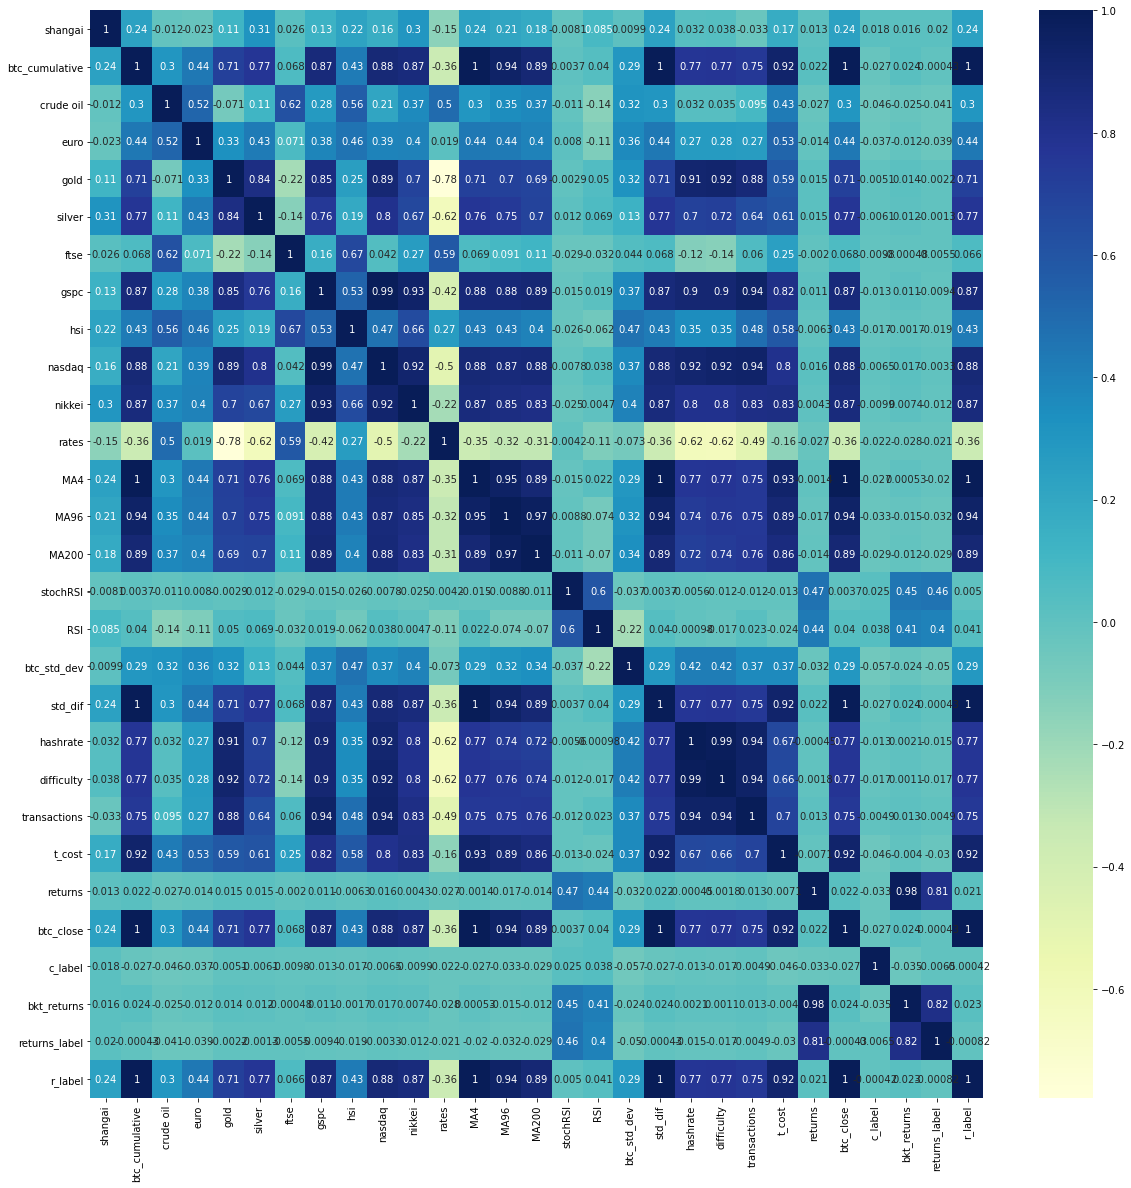

In [53]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), 
        xticklabels=df.corr().columns,
        yticklabels=df.corr().columns, ax=ax,
            annot=True, 
            cmap="YlGnBu")

In [54]:
# Description of normalized features
print(ndf.shape)
ndf.describe()

(2554, 29)


shangai  btc_cumulative    crude oil         euro         gold  \
count  2554.000000     2554.000000  2554.000000  2554.000000  2554.000000   
mean      0.305799        0.139352     0.686571     0.423066     0.338829   
std       0.138535        0.208625     0.092131     0.204810     0.246393   
min       0.000000        0.000000     0.000000     0.000000     0.000000   
25%       0.218426        0.006296     0.630352     0.277617     0.169281   
50%       0.294399        0.081027     0.682602     0.379309     0.236984   
75%       0.376169        0.148915     0.746104     0.576636     0.464500   
max       1.000000        1.000000     1.000000     1.000000     1.000000   

            silver         ftse         gspc          hsi       nasdaq  \
count  2554.000000  2554.000000  2554.000000  2554.000000  2554.000000   
mean      0.350531     0.654222     0.328047     0.503290     0.301387   
std       0.210058     0.190738     0.241264     0.199342     0.256691   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.219385     0.516854     0.107289     0.356294     0.080354   
50%       0.284663     0.694410     0.303635     0.513647     0.254828   
75%       0.356041     0.809596     0.430857     0.662250     0.382095   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            nikkei        rates          MA4         MA96        MA200  \
count  2554.000000  2554.000000  2554.000000  2554.000000  2554.000000   
mean      0.412514     0.543129     0.140011     0.146548     0.154367   
std       0.216483     0.238591     0.210106     0.220233     0.226580   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.273030     0.401097     0.006031     0.004597     0.004449   
50%       0.386740     0.586472     0.081419     0.086211     0.102686   
75%       0.511806     0.695612     0.149675     0.165392     0.188648   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          stochRSI          RSI  btc_std_dev      std_dif     hashrate  \
count  2554.000000  2554.000000  2554.000000  2554.000000  2554.000000   
mean      0.523818     0.539432     0.202791     0.139352     0.237420   
std       0.351412     0.190909     0.101248     0.208625     0.268209   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.208084     0.403779     0.129161     0.006296     0.006233   
50%       0.526839     0.531221     0.243204     0.081027     0.128112   
75%       0.860055     0.679084     0.261777     0.148915     0.473871   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        difficulty  transactions       t_cost      returns    btc_close  \
count  2554.000000   2554.000000  2554.000000  2554.000000  2554.000000   
mean      0.260958      0.434071     0.145194     0.599752     0.139352   
std       0.296392      0.308842     0.167587     0.062587     0.208625   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.006878      0.144544     0.018746     0.575145     0.006296   
50%       0.137217      0.414773     0.089584     0.598728     0.081027   
75%       0.545347      0.702345     0.184626     0.624765     0.148915   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

           c_label  bkt_returns  returns_label      r_label  
count  2553.000000  2554.000000    2554.000000  2553.000000  
mean      0.484332     0.596744       0.484338     0.139405  
std       0.336444     0.061648       0.336379     0.208649  
min       0.000000     0.000000       0.000000     0.000000  
25%       0.500000     0.595506       0.500000     0.006306  
50%       0.500000     0.595506       0.500000     0.081112  
75%       0.500000     0.595506       0.500000     0.148919  
max       1.000000     1.000000       1.000000     1.000000

## Splitting the data for training and testing

We will take as training data from beginning of time until 2018, and test data from 2018-01-01 onwards.

<AxesSubplot:title={'center':'BTC price (log scale)'}, xlabel='Date'>

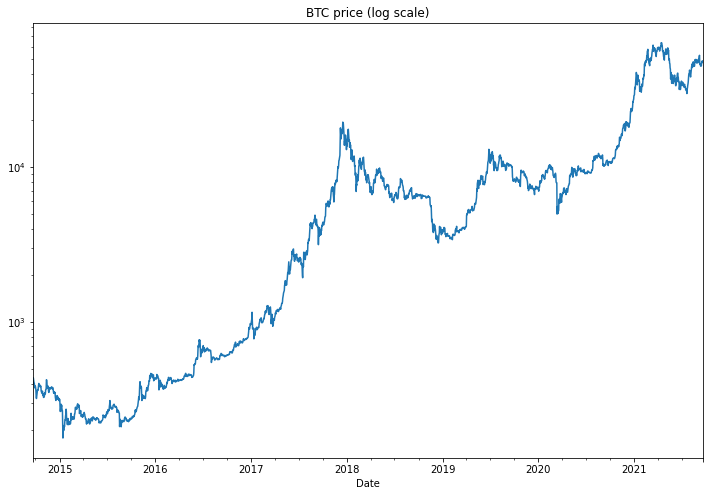

In [55]:
df.btc_close.loc[:].plot(figsize=(12,8), logy=True, title='BTC price (log scale)')

In [56]:
train_x = df.loc[:'2018-01-01']
train_nx = ndf.loc[:'2018-01-01']

test_x = df.loc['2018-01-01':]
test_nx = ndf.loc['2018-01-01':]

# Dropping last column of test (since they are shifted)
test_x.drop(test_x.index[-1], inplace=True)
test_nx.drop(test_nx.index[-1], inplace=True)

# Create labels for regression (price forecast) and classification (trading prediction)
train_y = train_x[['r_label', 'c_label']]
train_ny = train_nx[['r_label', 'c_label']]

test_y = test_x[['r_label', 'c_label']]
test_ny = test_nx[['r_label', 'c_label']]

test_x.tail()

/Users/rj/anaconda3/envs/finance/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


shangai  btc_cumulative  crude oil      euro      gold    silver  \
Date                                                                            
2021-09-13  1.609854       98.315613   0.746134  0.911481  1.451717  1.272732   
2021-09-14  1.586989      102.971768   0.746240  0.911481  1.462006  1.277501   
2021-09-15  1.584224      105.341711   0.769011  0.910943  1.452041  1.273054   
2021-09-16  1.562936      104.482409   0.769011  0.912102  1.421419  1.219097   
2021-09-17  1.565917      103.354481   0.762233  0.908049  1.417207  1.194610   

                ftse      gspc       hsi    nasdaq    nikkei     rates  \
Date                                                                     
2021-09-13  1.042399  2.232612  1.058967  3.311037  1.916294  0.509231   
2021-09-14  1.037340  2.219782  1.046185  3.296171  1.930313  0.491154   
2021-09-15  1.034745  2.238593  1.026944  3.323301  1.920344  0.501538   
2021-09-16  1.036367  2.235120  1.011956  3.327770  1.908488  0.511923   
2021-09-17  1.026943  2.214757  1.022331  3.297533  1.919610  0.526923   

                MA4     MA96    MA200   stochRSI        RSI  btc_std_dev  \
Date                                                                       
2021-09-13  45278.0  40176.0  45908.0   8.521508  37.284057     0.039151   
2021-09-14  45830.0  40284.0  45912.0  43.399238  51.893563     0.039153   
2021-09-15  46574.0  40397.0  45922.0  56.667629  57.451396     0.039148   
2021-09-16  47004.0  40525.0  45935.0  50.479771  54.859440     0.039141   
2021-09-17  47580.0  40610.0  45923.0  42.038695  51.323661     0.039134   

                 std_dif      hashrate    difficulty  transactions  \
Date                                                                 
2021-09-13  44963.035068  1.455522e+08  1.841516e+13   669940561.0   
2021-09-14  47092.453034  1.537910e+08  1.841516e+13   670195353.0   
2021-09-15  48176.308509  1.299900e+08  1.841516e+13   670463218.0   
2021-09-16  47783.320234  1.244974e+08  1.841516e+13   670732475.0   
2021-09-17  47267.480397  1.345671e+08  1.841516e+13   671003106.0   

                t_cost   returns     btc_close  c_label  bkt_returns  \
Date                                                                   
2021-09-13  177.148666 -0.023884  44963.074219      2.0    -0.023884   
2021-09-14  183.575951  0.047359  47092.492188      2.0     0.047359   
2021-09-15  159.976775  0.023015  48176.347656      1.0     0.023015   
2021-09-16  152.818373 -0.008157  47783.359375      1.0     0.000000   
2021-09-17  164.585875 -0.010795  47267.519531      1.0     0.000000   

            returns_label       r_label  
Date                                     
2021-09-13              0  47092.492188  
2021-09-14              2  48176.347656  
2021-09-15              2  47783.359375  
2021-09-16              1  47267.519531  
2021-09-17              1  48287.042969

In [57]:
# Drop labels and unneeded columns on train & test feature data sets
drop_list = ['r_label','c_label','bkt_returns']
drop_df = [train_x, train_nx, test_x, test_nx]

for x in drop_df:
    x.drop(columns=drop_list, inplace=True)
#     x['ts'] = x['Date'].datetime.astype('int64') // 10**9
#     x.set_index('ts')
#     x.drop(columns=['ts'], inplace=True)

/Users/rj/anaconda3/envs/finance/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Storing the data for future use

In [58]:
# Storing original and normalized data in CSVs
store_list = [train_x, train_nx, test_x, test_nx, train_y, train_ny, test_y, test_ny]
# !mkdir data
store_name = ['data/train_x.csv', 'data/train_nx.csv', 'data/test_x.csv', 'data/test_nx.csv', 'data/train_y.csv', 'data/train_ny.csv', 'data/test_y.csv', 'data/test_ny.csv']

for i in range(len(store_list)):
    store_list[i].to_csv(store_name[i])

## Recap and Discussion

### What was done?

We started by obtaining and preprocessing the data, specifically:
- Used Quandl and yfinance to source stock market, currencies and Bitcoin fundamentals. 
- Calculated technical analysis indicators, such as simple moving averages, relative strength index (RSI), stochastic RSI, cumulated standard deviation and distance to prices.
- Labelled data necessary to provide trading signal predictions later. These labels were selected according to the historical distribution of daily Bitcoin returns. 
- Created a heatmap to have an initial feeling of correlation between features.
- Cleaned up the data sets for NA values and stored training and testing data.

# What comes next?

In the next notebook, you will find the following sections:

- **Splitting the data** into test, train and labels
- **PCA for dimensionality reduction** / feature selection
- **XGBoost for price forecasting and trading signal**
- **Neural network for price forecasting and trading signal**
- **Final discussion and model comparisson**